In [311]:
import pandas as pd
import numpy as np

In [312]:
# IMPORTING THE DATASETS USING IBM CLOUD snippet
df= pd.read_csv('finalSynthesizedData.csv')
dt=df['Placed']
df.drop('Placed',axis=1,inplace=True)
df['Placed']=dt
df = df.iloc[: , 1:]
df.head()

,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,...,10th marks,12th marks,Cgpa,Internships(Y/N),Training(Y/N),Backlog in 5th sem,Innovative Project(Y/N),Communication level,Technical Course(Y/N),Placed
0,21,8,12,23,7.866404,6.043502,8.106605,6.569554,6.175482,6.918277,...,86.338955,97.788261,8.570042,0,0,0,0.000587,4,-0.000508,1
1,7,18,25,14,6.994999,8.129390,7.521782,8.368221,7.967448,7.009566,...,87.519114,71.311618,7.581604,0,0,1,0.999907,3,0.999432,1
2,18,18,18,17,8.374762,5.828158,8.140922,8.269819,5.465320,7.198969,...,86.096605,73.731147,9.501827,0,1,0,0.999300,4,0.999072,1
3,7,11,7,14,8.788102,4.696099,7.055221,7.138247,4.763941,4.045880,...,77.773048,85.777207,8.478415,1,0,1,-0.001498,1,-0.000826,0
4,22,21,20,20,7.620254,8.862488,9.286424,5.638060,7.452497,7.217039,...,87.194736,61.156510,6.343227,0,1,0,-0.001891,4,0.999588,0


<Axes: >

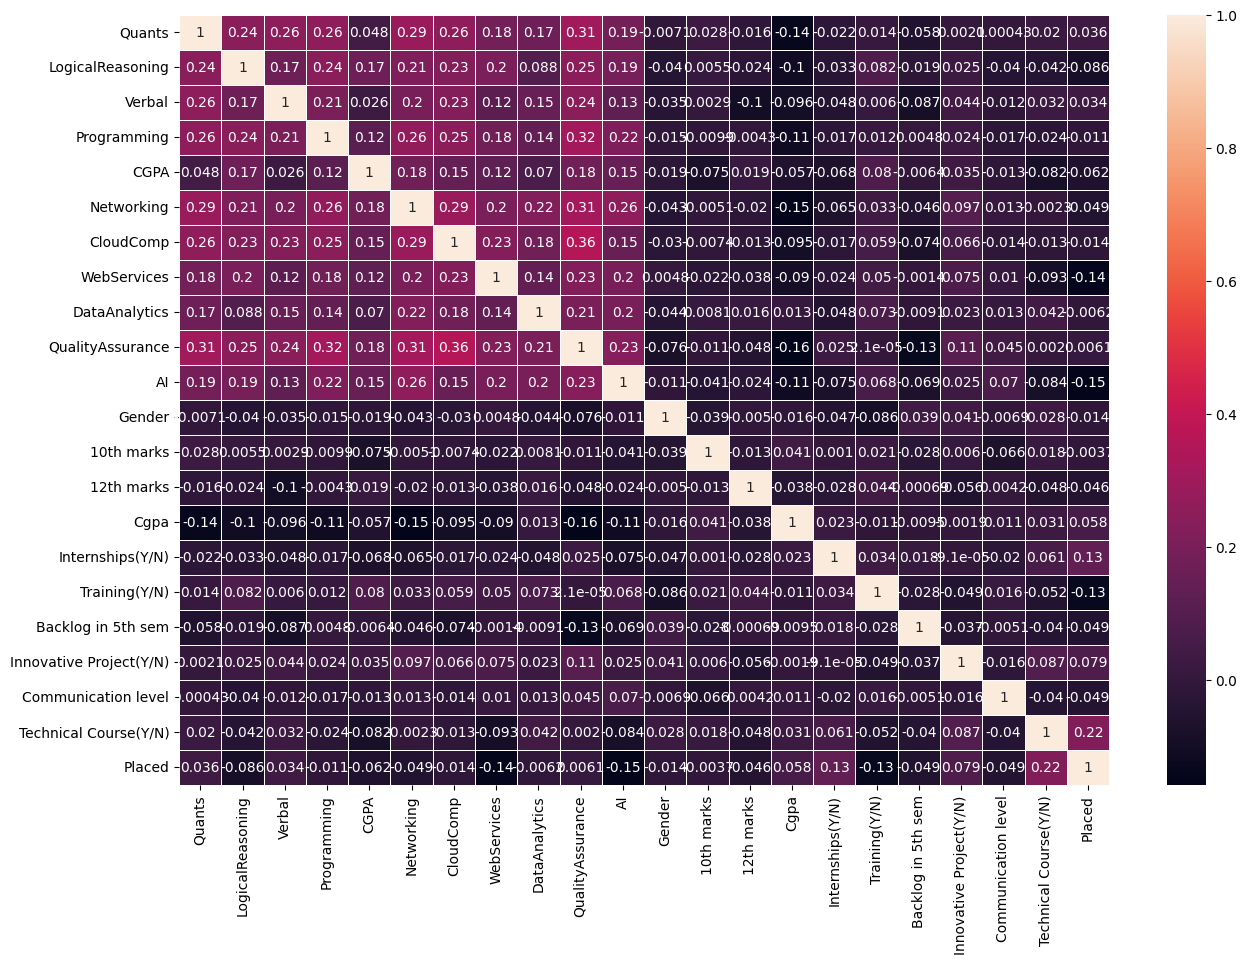

In [313]:
import seaborn as sea
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Create a heatmap to visualize the correlation matrix of the DataFrame
# This heatmap provides a graphical representation of the correlations between numeric columns in the DataFrame.
# Each cell color indicates the strength and direction of the correlation between two variables.

sea.heatmap(df.corr(), annot=True, linewidth=0.5)


In [314]:
# Split the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# The 'test_size' parameter defines the proportion of the dataset that becomes the testing set.
# In this case, 20% of the data is allocated to the testing set, and the remaining 80% is used for training.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = df.dropna()  # Removes rows with any NaN values


y=df['Placed']
X=df.drop(columns=['Placed'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [315]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model=RandomForestClassifier(n_estimators=50,min_samples_split=10,max_depth=10)

In [316]:
Random_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50)

In [317]:
Random_forest_model.score(X_train,y_train)

0.955

In [318]:
output = Random_forest_model.predict(X_test)
acc=accuracy_score(output,y_test)
print(acc)

0.725


In [319]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [320]:
# Create a dictionary containing different classification models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(max_depth=10,min_samples_split=20),
    'DecisionTree': DecisionTreeClassifier(max_depth=10,min_samples_split=20)
}

In [321]:


# Loop through each model in the dictionary
for model_name, model in models.items():
    model.fit(X_train,y_train)
    print('\n')
    print(model_name)
    print()
    
    #training results:
    train_pred=model.predict(X_train)
    acc=accuracy_score(train_pred,y_train)
    print("here is the mean accuracry of training set:",acc)
    print("here is the classification report:\n",classification_report(train_pred,y_train))

    # testing results:
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    print("Here is the mean accuracy of testing set:",acc)
    print("Final classification-report:\n",classification_report(y_pred,y_test))


    print("=" * 40)




LogisticRegression

here is the mean accuracry of training set: 0.665
here is the classification report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       465
           1       0.59      0.64      0.61       335

    accuracy                           0.67       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.67      0.67      0.67       800

Here is the mean accuracy of testing set: 0.655
Final classification-report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.66       106
           1       0.62      0.69      0.65        94

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.66       200



RandomForestClassifier

here is the mean accuracry of training set: 0.905
here is the classification report:
               precision    recall  f1-score   su

/Users/sshankaranarayanan/Desktop/ml portion/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [322]:
'''
Based on the provided performance metrics for each model, here's a summary of the results:

Random forest Model:
------------------------------------------------------------------
The model performs well on both the training and testing sets.
Accuracy, F1 Score, and Precision are high on both sets.
'''
#It shows good generalization to the testing data.
model=RandomForestClassifier(max_depth=10,min_samples_split=20)

In [323]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [324]:
model.predict(X_test[:10])

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1])